# KFold Exercise Notebook
-------------
We will use the same IceCreamData.csv dataset in this notebook, but apply [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html?fbclid=IwAR2ERHwjvOEUgcgkVQMUzpb0K3LKOneariiBSo8RsPeYgpVxrUdoDlGS2Gk) validation in the evaluation of the model.

## Part 1: Same as DT & RF Notebook
-----
Importing the modules, reading the data

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('IceCreamData.csv')

In [25]:
X = df['Temperature']
Y = df['Revenue']

In [23]:
model = DecisionTreeRegressor(max_depth=4)

## Part 2: Data splitting using KFold & Model Training & Evaluation

Accuracy = 97.09%


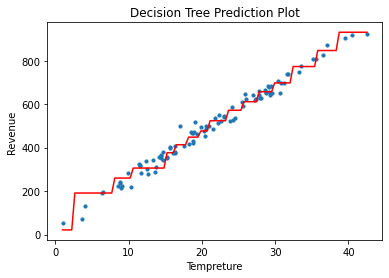

Accuracy = 96.35%


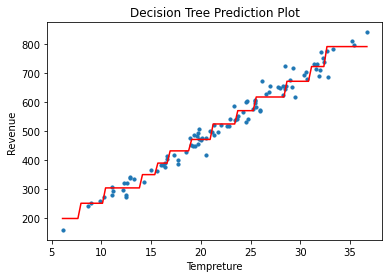

Accuracy = 95.73%


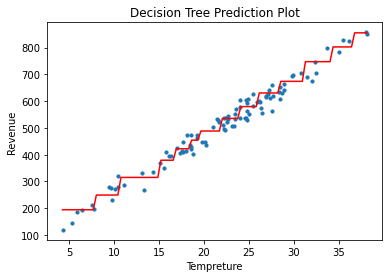

Accuracy = 97.39%


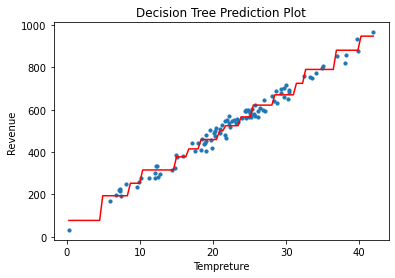

Accuracy = 95.44%


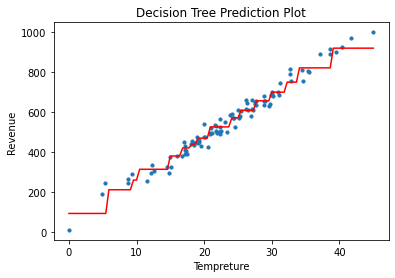



Average Accuracy = 96.40%


In [15]:
from sklearn.model_selection import KFold
# define your k-fold number of divisions
kf = KFold(n_splits=5)

for train_indices, test_indices in kf.split(X):
    # Split data based on indices
    X_train, X_test = X[train_indices], X[test_indices]
    Y_train, Y_test = Y[train_indices], Y[test_indices]
    
    X_train, X_test = np.expand_dims(X_train, 1), np.expand_dims(X_test, 1)
    
    model_fitted = model.fit(X_train, Y_train)
    
    accuracy = model_fitted.score(X_test, Y_test)
    avg_accuracy += accuracy
    print("Accuracy = %.2f" % (accuracy * 100), '%', sep='')
    
    plt.scatter(X_test, Y_test, s=10)
    X_range = np.linspace(min(X_test), max(X_test), 100)
    Y_pred = model_fitted.predict(X_range)
    plt.plot(X_range, Y_pred, color='red')
    plt.xlabel('Tempreture')
    plt.ylabel('Revenue')
    plt.title('Decision Tree Prediction Plot')
    plt.show()

avg_accuracy /= 5.0
print("\n\nAverage Accuracy = %.2f" % (avg_accuracy * 100), '%', sep='')

### Calculating Average KFold Accuracy using built-in function
----
Using [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) function that does the above right away.

In [26]:
X = np.expand_dims(X, 1)
results_kfold = cross_val_score(model, X, Y, cv=kf)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 96.40%
